<a href="https://colab.research.google.com/github/Erssa001/ECGR_4105/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd

# Standardization

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
file_path = '/content/drive/My Drive/2023-2024/ECGR_4105/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [31]:
bi_vars =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] # Add 'price' to list for scaling of the output

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[bi_vars] = housing[bi_vars].apply(binary_map)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [32]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# Preprocessing (uncomment a scaler type and both scaler implementations for problems)
#scaler = StandardScaler()
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

Y_train = df_train['price']
Y_test = df_test['price']

# Inputs for part A of each problem
# inputs_to_use = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# Inputs for part B of each problem
inputs_to_use = ['area', 'bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning', 'parking', 'prefarea']

train_inputs = []
test_inputs = []
for i in range(len(inputs_to_use)):
  train_inputs.append(df_train[inputs_to_use[i]].values)
  test_inputs.append(df_test[inputs_to_use[i]].values)

m = len(Y_train)  # Number of training examples
n = len(Y_test)   # Number of validation examples

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [33]:
def reshape_for_reg(inputs, m):
  for i in range(len(inputs)):
    inputs[i - 1] = inputs[i - 1].reshape(m, 1)
  X_arr = np.ones((m, 1))
  for i in range(len(inputs)):
    X_arr = np.hstack((X_arr, inputs[i]))
  return X_arr

# Shape the input data using reshape function defined above
X_t = reshape_for_reg(train_inputs, m)
X_v = reshape_for_reg(test_inputs, n)

In [34]:
def compute_cost(X, Y, regParam, theta):
  # Paramater penalty code
  thetaSum = np.sum(np.square(theta[1:]))

  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = (1 / (2 * len(Y))) * (np.sum(sqrErrors) + (regParam * thetaSum))
  return J

def gradient_descent(X_t, X_v, Y_t, Y_v, theta, alpha, regParam, iterations):

  m = len(Y_t)  # Number of training examples
  train_cost_history = np.zeros(iterations)
  test_cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X_t.dot(theta)
    errors = np.subtract(predictions, Y_t)
    sum_delta = (alpha / m) * X_t.transpose().dot(errors)
    theta -= sum_delta
    train_cost_history[i] = compute_cost(X_t, Y_t, regParam, theta)
    test_cost_history[i] = compute_cost(X_v, Y_v, 0, theta) # No regularization for test

  cost_history = [train_cost_history, test_cost_history]

  return theta, cost_history

In [35]:
# This code cell will set the paramaters of regression and run the model.

theta = np.zeros(len(test_inputs) + 1)
iterations = 5000
alpha = 0.025
regParam = 6.5 # Set to zero for no paramater penulty (i.e. problems 1 & 2)

theta, cost_history = gradient_descent(X_t, X_v, Y_train.values, Y_test.values, theta, alpha, regParam, iterations)
print('Final value of theta =', theta)

Final value of theta = [-0.00081111  0.27866247  0.05729407  0.2869481   0.10740202  0.05566948
  0.03555038  0.02571431  0.07849229  0.07712904  0.07244859  0.05400104]


Minimum Training Loss =  0.005498812317015268
Final Training Loss =  0.005806760181451229
Minimum Validation Loss =  0.0053159538046121625
Final Validation Loss =  0.005817735954818638


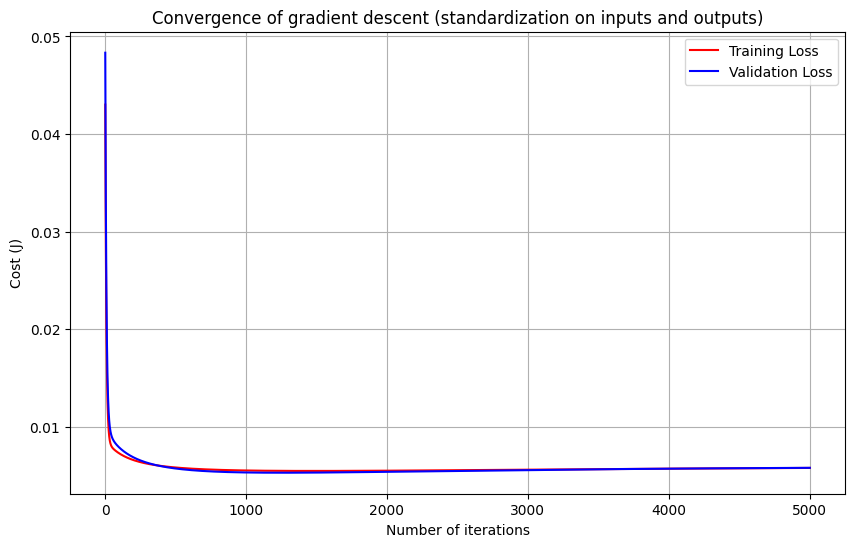

In [36]:
plt.plot(range(1, iterations + 1), cost_history[0], color='red', label='Training Loss')
plt.plot(range(1, iterations + 1), cost_history[1], color='blue', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.legend()

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent (standardization on inputs and outputs)')
print('Minimum Training Loss = ', min(cost_history[0]))
print('Final Training Loss = ', cost_history[0][-1])
print('Minimum Validation Loss = ', min(cost_history[1]))
print('Final Validation Loss = ', cost_history[1][-1])

# Show the plot
plt.show()